In [1]:
import pandas as pd
import numpy as np
from scipy.signal import medfilt
import matplotlib.pyplot as plt
import os
from scipy import version
version.version

'1.12.0'

In [2]:
windsize = 51
os.system(f'./hampel {windsize}')

Time taken: 10.312000 miliseconds for window size 51 and signal size 40000
Output for window size 51 created


0

In [3]:
df = pd.read_csv(f'output{windsize}.csv', float_precision='high')
df

,time,input,output,median,MAD
0,0.00000,-4.585333,-4.585333,-4.585333,0.000000
1,0.00005,-3.107299,-2.936220,-3.130063,0.193843
2,0.00010,-3.099761,-3.030517,-3.116114,0.144568
3,0.00015,-3.130063,-3.111819,-3.111819,0.140274
4,0.00020,-3.033141,-3.107299,-3.107299,0.135754
...,...,...,...,...,...
39995,1.99975,2.756957,2.771353,2.733691,0.037662
39996,1.99980,2.726058,2.771353,2.741503,0.029850
39997,1.99985,2.675930,2.771353,2.751100,0.020253
39998,1.99990,2.751100,2.771353,2.756957,0.014395


In [4]:
%timeit medfilt(df.input.values, windsize)

27.7 ms ± 4.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
ref_med = medfilt(df.input, windsize)[windsize//2:-windsize//2]
current_med = df['median'].values[windsize//2:-windsize//2]
assert (ref_med == current_med).all()

In [6]:
current_mad = df['MAD'].values[windsize//2:-windsize//2]
ref_mad = df.input.rolling(windsize, center=True).apply(lambda x: np.median(np.abs(x - np.median(x)))).squeeze().values[windsize//2:-windsize//2]
assert np.abs(current_mad - ref_mad).__le__(2e-15).all()

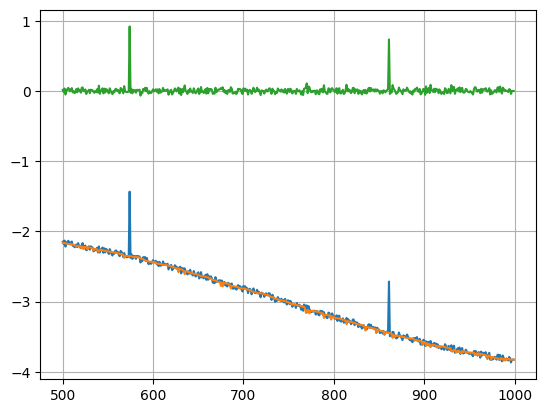

In [7]:
plt.plot(df.iloc[500:1000, 1])
plt.plot(df.iloc[500:1000, 2])
plt.plot(df.iloc[500:1000, 1] - df.iloc[500:1000, 2])
plt.grid()
plt.show()